In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## Dataset: HSG Historical Data


In [23]:
# Read the CSV file
hsg = pd.read_csv(r'C:\Documents\PTTK\Project\HSG Historical Data.csv')

hsg = hsg.sort_index(ascending=False)
hsg = hsg.reset_index(drop=True)
hsg['Date'] = pd.to_datetime(hsg['Date'])
hsg.set_index('Date', inplace=True)

# Modify data
# Remove the '%' sign and convert to float
hsg['Change %'] = hsg['Change %'].replace('%', '', regex=True).astype(float)

# Convert the percentage values to decimals (divide by 100)
hsg['Change %'] = hsg['Change %'] / 100

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    hsg[col] = hsg[col].str.replace(',', '').astype(float)

missing_values = hsg.isnull().sum()
hsg = hsg.dropna()

# Function to convert 'K' values to integers
def convert_volume(value):
    if pd.isnull(value):
        return np.nan  # Handle missing values
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)

# Apply the function to the "Volume" column
hsg['Vol.'] = hsg['Vol.'].apply(convert_volume)

# Display the cleaned DataFrame
df = hsg[['Price']]
df

,Price
Date,
2020-01-02,5909.1
2020-01-03,5757.6
2020-01-06,5786.4
2020-01-07,5721.5
2020-01-08,5678.2
...,...
2024-10-28,20750.0
2024-10-29,20700.0
2024-10-30,20350.0


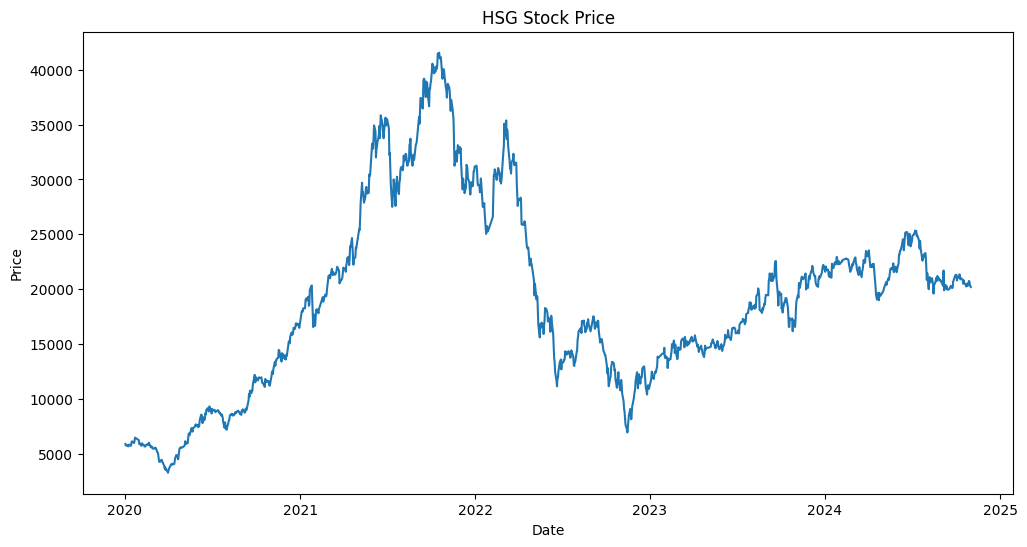

In [24]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(df['Price'])
plt.title('HSG Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [25]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

### Ratio 7:3

In [26]:
# 4. train data test data
train_size = round(0.7 * len(df))
test_size = round(len(df) - train_size)

train_data = df[:train_size]
test_data = df[train_size:]

In [27]:
# 5. Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [28]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(64,return_sequences=True))

model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

d:\Programe File\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
# 9. Fit model with train data
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - loss: 0.1311
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 0.0224
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 168ms/step - loss: 0.0079
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.0063
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - loss: 0.0053
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 0.0046
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - loss: 0.0043
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.0038
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.0032
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 0.0027
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 0.0028
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 155ms/step - loss: 0.0024
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step - loss: 0.0024
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - loss: 0.0021
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s

In [32]:
y_pred=model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step


In [33]:
# 11. Normalize with ytest, y_pred data
ytest=scaler.inverse_transform(ytest.reshape(-1,1))
y_pred=scaler.inverse_transform(y_pred)

In [34]:
# 12. Evaluate algorithm accuracy
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_pred - ytest))
print("Testing MAE:", test_mae)
# Calculate R^2 for the testing set
y_test_mean = np.mean(ytest)
ss_total = np.sum((ytest - y_test_mean)**2)  # Total sum of squares
ss_residual = np.sum((ytest - y_pred)**2)   # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)
print("Testing R^2:", r2)


Testing RMSE: 715.6246896974063
Testing MAPE: 2.509779675443559
Testing MAE: 526.3200176604407
Testing R^2: 0.8327118838412619


In [39]:
# 13. predict 30,60,90 following days
def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_future(model, test_data, n_steps, 30)
pred_60_days = predict_future(model, test_data, n_steps, 60)
pred_90_days = predict_future(model, test_data, n_steps, 90)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))


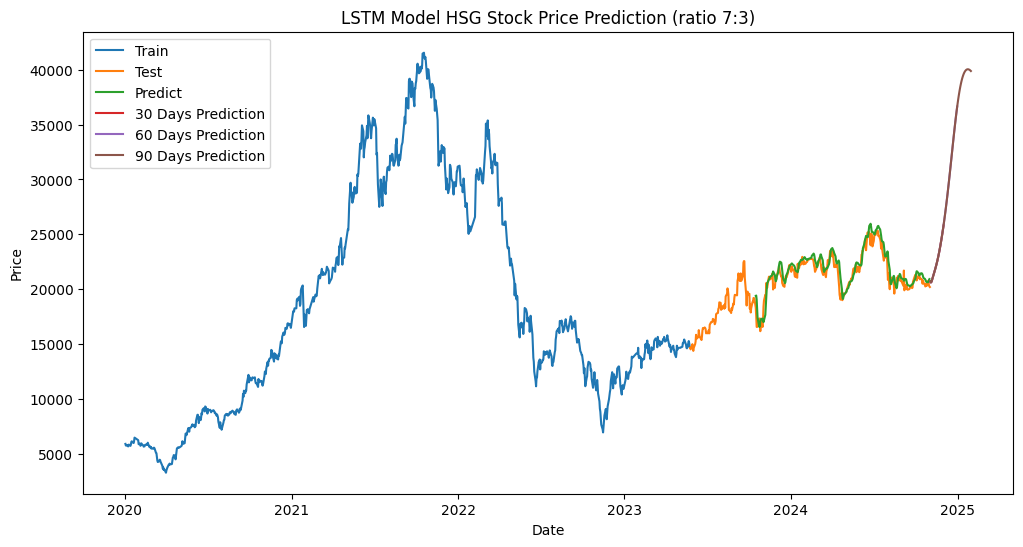

In [40]:
# Assuming `hsg`, `train_size`, `train_data`, `test_data`, `y_pred`, `pred_30_days`, `pred_60_days`, and `pred_90_days` are defined

# Visualize the predictions
plt.figure(figsize=(12, 6))

# Plot the train and test data
dates = hsg.index
plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')

# Plot the predicted test data
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

# Get the last date from the dates index
last_date = dates[-1]

# Forecast for the next 30, 60, and 90 days
future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60)
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90)

plt.plot(future_dates_30, pred_30_days, label='30 Days Prediction')
plt.plot(future_dates_60, pred_60_days, label='60 Days Prediction')
plt.plot(future_dates_90, pred_90_days, label='90 Days Prediction')


# Add title and labels
plt.title('LSTM Model HSG Stock Price Prediction (ratio 7:3)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Show the plot
plt.show()

### Ratio 8:2

In [41]:
# 4. train, test data
train_size = round(0.8 * len(df))
test_size = round(len(df) - train_size)

train_data = df[:train_size]
test_data = df[train_size:]

In [42]:
# 5. Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [43]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [44]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

d:\Programe File\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
# 9. Fit model with train data
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 119ms/step - loss: 0.1157
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - loss: 0.0146
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.0063
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 130ms/step - loss: 0.0041
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0035
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0033
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - loss: 0.0031
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - loss: 0.0029
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0026
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0024
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0021
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.0021
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0017
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 0.0020
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s

In [47]:
# 10. predict test, val
y_pred=model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 347ms/step


In [48]:
# 11. Normalize ytest, y_pred data
ytest=scaler.inverse_transform(ytest.reshape(-1,1))
y_pred=scaler.inverse_transform(y_pred)

In [49]:
# 12. Evaluate algorithm accuracy
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_pred - ytest))
print("Testing MAE:", test_mae)

# Calculate R^2 for the testing set
y_test_mean = np.mean(ytest)
ss_total = np.sum((ytest - y_test_mean)**2)  # Total sum of squares
ss_residual = np.sum((ytest - y_pred)**2)   # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)
print("Testing R^2:", r2)

Testing RMSE: 703.0626813739708
Testing MAPE: 2.368529507416938
Testing MAE: 510.0553431919643
Testing R^2: 0.8390460332519221


In [50]:
# 13. predict 30, 60, 90 following days
def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_future(model, test_data, n_steps, 30)
pred_60_days = predict_future(model, test_data, n_steps, 60)
pred_90_days = predict_future(model, test_data, n_steps, 90)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))


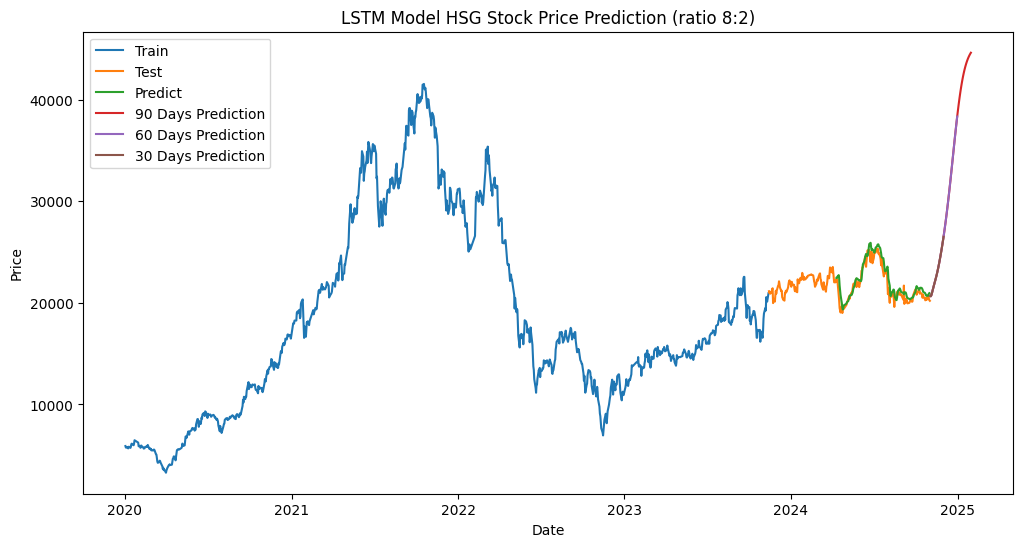

In [51]:
#14. Visualize the prediction
plt.figure(figsize=(12, 6))
dates = hsg.index

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates[-1]

# 30 days
future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# 60 days
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60)

# 90 days
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90)

plt.plot(future_dates_90, np.concatenate((pred_30_days, pred_60_days[30:], pred_90_days[60:])), label='90 Days Prediction')
plt.plot(future_dates_60, np.concatenate((pred_30_days, pred_60_days[30:])), label='60 Days Prediction')
plt.plot(future_dates_30, pred_30_days, label='30 Days Prediction')
plt.title('LSTM Model HSG Stock Price Prediction (ratio 8:2)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

### Radio 9:1

In [52]:
# 4. train data test data
train_size = round(0.9 * len(df))
test_size = round(len(df) - train_size)

train_data = df[:train_size]
test_data = df[train_size:]

In [53]:
# 5. Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [54]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [55]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [56]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

d:\Programe File\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [58]:
# 9. Fit model with train data
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - loss: 5.0525e-04
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 5.2585e-04
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 4.2656e-04
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - loss: 5.7714e-04
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 4.3381e-04
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - loss: 5.1400e-04
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 4.1146e-04
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 4.2929e-04
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 4.3670e-04
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - loss: 4.0891e-04
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 4.1189e-04
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - loss: 4.2597e-04
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - loss: 4.3917e-04
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss

In [59]:
# 10. predict on test data
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step


In [60]:
# 11. normalize ytest, y_pred data
ytest=scaler.inverse_transform(ytest.reshape(-1,1))
y_pred=scaler.inverse_transform(y_pred)

In [61]:
# 12. Evaluate algorithm accuracy 
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_pred - ytest))
print("Testing MAE:", test_mae)

# Calculate R^2 for the testing set
y_test_mean = np.mean(ytest)
ss_total = np.sum((ytest - y_test_mean)**2)  # Total sum of squares
ss_residual = np.sum((ytest - y_pred)**2)   # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)
print("Testing R^2:", r2)

Testing RMSE: 278.34339530513665
Testing MAPE: 1.1458455500957312
Testing MAE: 236.1765625
Testing R^2: 0.31052854365656546


In [62]:
# 13. predict 30, 60, 90 following days
def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_future(model, test_data, n_steps, 30)
pred_60_days = predict_future(model, test_data, n_steps, 60)
pred_90_days = predict_future(model, test_data, n_steps, 90)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

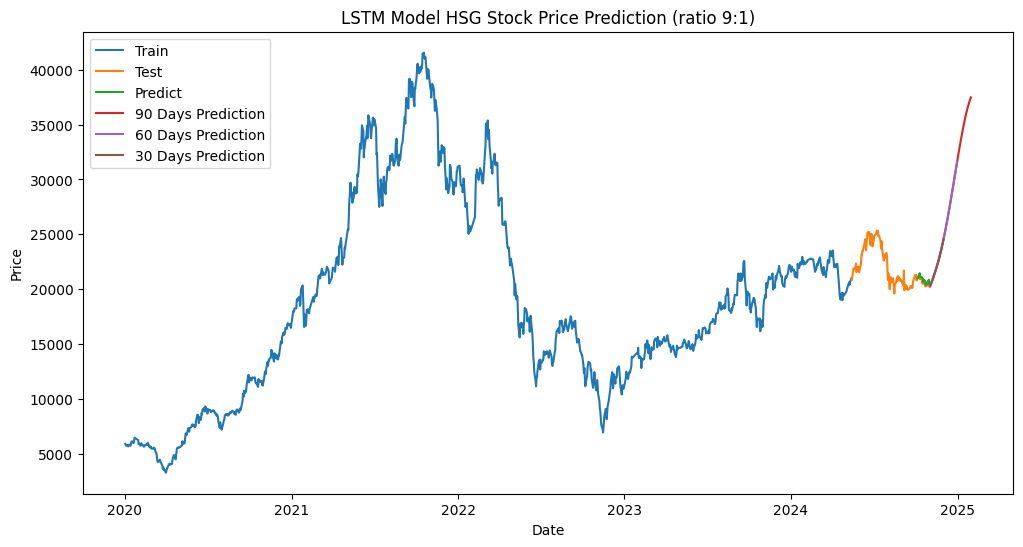

In [64]:
#14. Visualize the prediction
plt.figure(figsize=(12, 6))
dates = hsg.index

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates[-1]

# 30 days
future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# 60 days
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60)

# 90 days
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90)

plt.plot(future_dates_90, np.concatenate((pred_30_days, pred_60_days[30:], pred_90_days[60:])), label='90 Days Prediction')
plt.plot(future_dates_60, np.concatenate((pred_30_days, pred_60_days[30:])), label='60 Days Prediction')
plt.plot(future_dates_30, pred_30_days, label='30 Days Prediction')
plt.title('LSTM Model HSG Stock Price Prediction (ratio 9:1)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

## Dataset: NKG Historical Data


In [66]:
# Read the CSV file
nkg = pd.read_csv(r'C:\Documents\PTTK\Project\NKG Historical Data.csv')
nkg = nkg.sort_index(ascending=False)
nkg = nkg.reset_index(drop=True)
nkg['Date'] = pd.to_datetime(nkg['Date'])
nkg.set_index('Date', inplace=True)

# Modify data
# Remove the '%' sign and convert to float
nkg['Change %'] = nkg['Change %'].replace('%', '', regex=True).astype(float)

# Convert the percentage values to decimals (divide by 100)
nkg['Change %'] = nkg['Change %'] / 100

# Format column "Price", "Open", "High", "Low"
for col in ['Price', 'Open', 'High', 'Low']:
    nkg[col] = nkg[col].str.replace(',', '').astype(float)


missing_values = nkg.isnull().sum()
nkg = nkg.dropna()

# Function to convert 'K' values to integers
def convert_volume(value):
    if pd.isnull(value):
        return np.nan  # Handle missing values
    elif 'K' in value:
        return float(value.replace('K', '')) * 1000
    elif 'M' in value:
        return float(value.replace('M', '')) * 1000000
    elif 'B' in value:
        return float(value.replace('B', '')) * 1000000000
    else:
        return float(value)

# Apply the function to the "Volume" column
nkg['Vol.'] = nkg['Vol.'].apply(convert_volume)

# Display the cleaned DataFrame
df = nkg[['Price']]
df

,Price
Date,
2020-01-02,4849.1
2020-01-03,4987.1
2020-01-06,5079.1
2020-01-07,5079.1
2020-01-08,5203.9
...,...
2024-10-28,20700.0
2024-10-29,20750.0
2024-10-30,20650.0


In [67]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

### Ratio 7:3

In [68]:
# 4. train data test data
train_size = round(0.7 * len(df))
test_size = round(len(df) - train_size)

train_data = df[:train_size]
test_data = df[train_size:]

In [69]:
# 5. Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [70]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [71]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [72]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

d:\Programe File\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [73]:
# 9. Fit model with train data
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 0.0973
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - loss: 0.0141
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - loss: 0.0076
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - loss: 0.0041
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - loss: 0.0042
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - loss: 0.0036
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - loss: 0.0033
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0031
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - loss: 0.0025
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - loss: 0.0021
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - loss: 0.0022
Epoch 12/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step - loss: 0.0021
Epoch 13/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - loss: 0.0022
Epoch 14/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 122ms/step - loss: 0.0020
Epoch 15/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [74]:
# 10. predict on test data
y_pred=model.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step


In [75]:
# 11. Normalize ytest, y_pred data
ytest=scaler.inverse_transform(ytest.reshape(-1,1))
y_pred=scaler.inverse_transform(y_pred)

In [76]:
# 12. Evaluate algorithm accuracy
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_pred - ytest))
print("Testing MAE:", test_mae)

# Calculate R^2 for the testing set
y_test_mean = np.mean(ytest)
ss_total = np.sum((ytest - y_test_mean)**2)  # Total sum of squares
ss_residual = np.sum((ytest - y_pred)**2)   # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)
print("Testing R^2:", r2)

Testing RMSE: 812.0625817988791
Testing MAPE: 2.767127619222136
Testing MAE: 626.9572707136015
Testing R^2: 0.8434564641741735


In [77]:
# 13. predict 30, 60, 90 following days
def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_future(model, test_data, n_steps, 30)
pred_60_days = predict_future(model, test_data, n_steps, 60)
pred_90_days = predict_future(model, test_data, n_steps, 90)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))

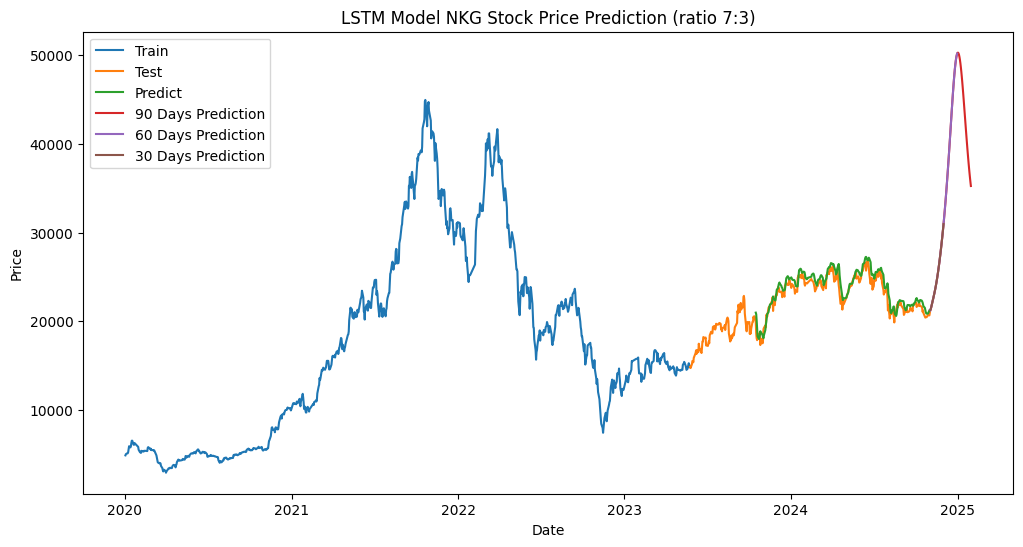

In [79]:
#14. Visualize the prediction
plt.figure(figsize=(12, 6))
dates = nkg.index

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates[-1]

# 30 days
future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# 60 days
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60)

# 90 days
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90)

plt.plot(future_dates_90, np.concatenate((pred_30_days, pred_60_days[30:], pred_90_days[60:])), label='90 Days Prediction')
plt.plot(future_dates_60, np.concatenate((pred_30_days, pred_60_days[30:])), label='60 Days Prediction')
plt.plot(future_dates_30, pred_30_days, label='30 Days Prediction')
plt.title('LSTM Model NKG Stock Price Prediction (ratio 7:3)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Ratio 8:2

In [80]:
# 4. train data, test data
train_size = round(0.8 * len(df))
test_size = round(len(df) - train_size)

train_data = df[:train_size]
test_data = df[train_size:]

In [81]:
# 5. create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [82]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [83]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [84]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

d:\Programe File\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [85]:
# 9. Fit model with train datadata
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - loss: 0.0727
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - loss: 0.0114
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0050
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0034
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0034
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0029
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0027
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.0024
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - loss: 0.0021
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.0020
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 0.0022
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - loss: 0.0025
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 0.0024
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - loss: 0.0019
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [86]:
# 10. predict on test data
y_pred=model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 395ms/step


In [87]:
# 11. Normalize ytest, y_pred data
ytest=scaler.inverse_transform(ytest.reshape(-1,1))
y_pred=scaler.inverse_transform(y_pred)

In [88]:
# 12. Evaluate algorithm accuracy
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_pred - ytest))
print("Testing MAE:", test_mae)

# Calculate R^2 for the testing set
y_test_mean = np.mean(ytest)
ss_total = np.sum((ytest - y_test_mean)**2)  # Total sum of squares
ss_residual = np.sum((ytest - y_pred)**2)   # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)
print("Testing R^2:", r2)

Testing RMSE: 800.437389331671
Testing MAPE: 2.5450837805379205
Testing MAE: 578.135435267857
Testing R^2: 0.822412973572686


In [89]:
# 13. 30, 60, 90 following days
def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_future(model, test_data, n_steps, 30)
pred_60_days = predict_future(model, test_data, n_steps, 60)
pred_90_days = predict_future(model, test_data, n_steps, 90)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))


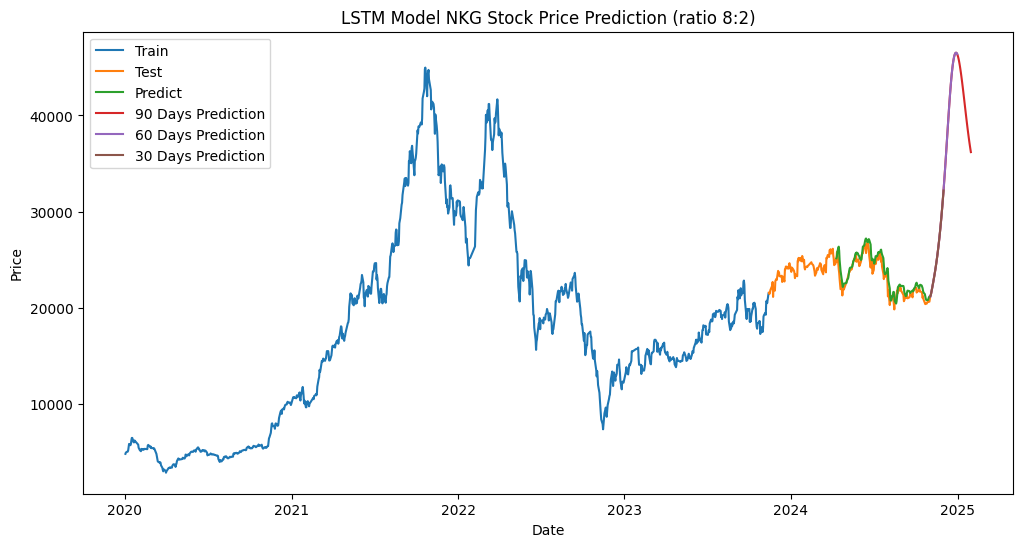

In [91]:
#14. Visualize the prediction
plt.figure(figsize=(12, 6))
dates = nkg.index

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates[-1]

# 30 days
future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# 60 days
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60)

# 90 days
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90)

plt.plot(future_dates_90, np.concatenate((pred_30_days, pred_60_days[30:], pred_90_days[60:])), label='90 Days Prediction')
plt.plot(future_dates_60, np.concatenate((pred_30_days, pred_60_days[30:])), label='60 Days Prediction')
plt.plot(future_dates_30, pred_30_days, label='30 Days Prediction')
plt.title('LSTM Model NKG Stock Price Prediction (ratio 8:2)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()

### Radio 9:1

In [92]:
# 4. train data test data
train_size = round(0.9 * len(df))
test_size = round(len(df) - train_size)

train_data = df[:train_size]
test_data = df[train_size:]

In [93]:
# 5. Create Dataset
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [94]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [95]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [96]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

d:\Programe File\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [97]:
# 9. Fit model with train data
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 113ms/step - loss: 0.1079
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.0111
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - loss: 0.0053
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - loss: 0.0036
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.0032
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 0.0030
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.0027
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step - loss: 0.0024
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - loss: 0.0023
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step - loss: 0.0022
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 150ms/step - loss: 0.0020
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 119ms/step - loss: 0.0018
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 182ms/step - loss: 0.0018
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - loss: 0.0017
Epoch 15/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s

In [98]:
# 10. predict on test data
y_pred=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step


In [99]:
# 11. Normalize ytest, y_pred data
ytest=scaler.inverse_transform(ytest.reshape(-1,1))
y_pred=scaler.inverse_transform(y_pred)

In [100]:
# 12. Evaluate algorithm accuracy
# Calculate RMSE for the testing set
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
print('Testing RMSE:', test_rmse)

# Calculate MAPE for the testing set
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print("Testing MAPE:", test_mape)

# Calculate MAE for the testing set
test_mae = np.mean(np.abs(y_pred - ytest))
print("Testing MAE:", test_mae)

# Calculate R^2 for the testing set
y_test_mean = np.mean(ytest)
ss_total = np.sum((ytest - y_test_mean)**2)  # Total sum of squares
ss_residual = np.sum((ytest - y_pred)**2)   # Residual sum of squares
r2 = 1 - (ss_residual / ss_total)
print("Testing R^2:", r2)

Testing RMSE: 217.93579257507358
Testing MAPE: 0.8086303402109739
Testing MAE: 171.00947265625
Testing R^2: 0.8566022917321996


In [101]:
# 13. predict 30, 90, 60 following days
def predict_future(model, data, time_step, future_days):
    x_input = data[-time_step:].reshape(1, -1)
    temp_input = x_input[0].tolist()
    lst_output = []
    i = 0
    while i < future_days:
        if len(temp_input) > time_step:
            x_input = np.array(temp_input[-time_step:])
            x_input = x_input.reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            temp_input = temp_input[1:]
            lst_output.extend(yhat.tolist())
            i += 1
        else:
            x_input = np.array(temp_input).reshape((1, time_step, 1))
            yhat = model.predict(x_input, verbose=0)
            temp_input.extend(yhat[0].tolist())
            lst_output.extend(yhat.tolist())
            i += 1
    return lst_output

n_steps = 100

pred_30_days = predict_future(model, test_data, n_steps, 30)
pred_60_days = predict_future(model, test_data, n_steps, 60)
pred_90_days = predict_future(model, test_data, n_steps, 90)

pred_30_days = scaler.inverse_transform(np.array(pred_30_days).reshape(-1, 1))
pred_60_days = scaler.inverse_transform(np.array(pred_60_days).reshape(-1, 1))
pred_90_days = scaler.inverse_transform(np.array(pred_90_days).reshape(-1, 1))


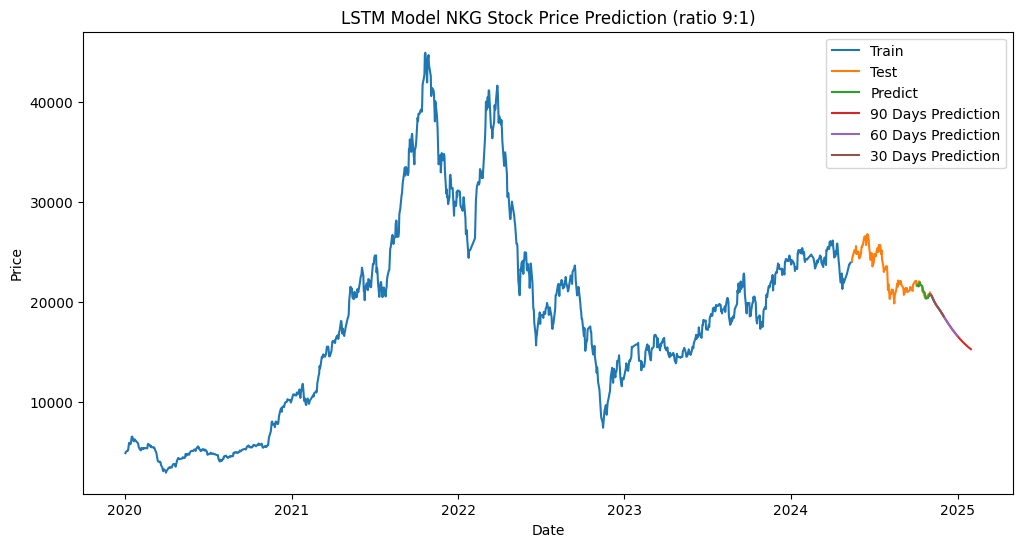

In [102]:
#14. Visualize the prediction
plt.figure(figsize=(12, 6))
dates = nkg.index

plt.plot(dates[:train_size], scaler.inverse_transform(train_data), label='Train')
plt.plot(dates[train_size:], scaler.inverse_transform(test_data), label='Test')
predicted_test_index_start = train_size + time_step
plt.plot(dates[predicted_test_index_start:predicted_test_index_start + len(y_pred)], y_pred, label='Predict')

last_date = dates[-1]

# 30 days
future_dates_30 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# 60 days
future_dates_60 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=60)

# 90 days
future_dates_90 = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=90)

plt.plot(future_dates_90, np.concatenate((pred_30_days, pred_60_days[30:], pred_90_days[60:])), label='90 Days Prediction')
plt.plot(future_dates_60, np.concatenate((pred_30_days, pred_60_days[30:])), label='60 Days Prediction')
plt.plot(future_dates_30, pred_30_days, label='30 Days Prediction')
plt.title('LSTM Model NKG Stock Price Prediction (ratio 9:1)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()